In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import hopsworks
import pandas as pd

/Users/deepakshankar/opt/anaconda3/envs/ML_DL/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/210070
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
wine_df = pd.read_csv("wineQualityN.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine_df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Replacing missing values with Random values of each column

In [8]:
# Replace missing values with random values from the respective columns
import numpy as np

for column in wine_df.columns:
    # Check if the column has missing values
    if wine_df[column].isnull().any():
        # Generate random values based on the column's distribution
        random_values = np.random.choice(wine_df[column].dropna(), wine_df[column].isnull().sum())
        # Assign random values to missing entries
        wine_df.loc[wine_df[column].isnull(), column] = random_values

# Verify if there are still any missing values
print(wine_df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### Transforming categorical variables(type) into numerical variables(red=0, white=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Transform categorical variables into numerical variables
label_encoder = LabelEncoder()
wine_df['type'] = label_encoder.fit_transform(wine_df['type'])

In [10]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
wine_df["type"].value_counts()

type
1    4898
0    1599
Name: count, dtype: int64

#### Calculating correlation

In [12]:
# Calculate the correlation between each feature and the target variable
correlations = wine_df.corr()['quality'].abs().sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265052
chlorides               0.200526
type                    0.119323
citric acid             0.085885
fixed acidity           0.076726
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038718
residual sugar          0.036946
pH                      0.019790
Name: quality, dtype: float64


                          type  fixed acidity  volatile acidity  citric acid  \
type                  1.000000      -0.485132         -0.652357     0.186882   
fixed acidity        -0.485132       1.000000          0.220257     0.321652   
volatile acidity     -0.652357       0.220257          1.000000    -0.377565   
citric acid           0.186882       0.321652         -0.377565     1.000000   
residual sugar        0.348875      -0.111276         -0.196745     0.142066   
chlorides            -0.512653       0.296584          0.376908     0.039217   
free sulfur dioxide   0.471644      -0.282866         -0.353331     0.133252   
total sulfur dioxide  0.700357      -0.328636         -0.415225     0.194734   
density              -0.390645       0.457609          0.270362     0.096050   
pH                   -0.327670      -0.250083          0.259990    -0.327326   
sulphates            -0.486525       0.298136          0.225119     0.057674   
alcohol               0.032970      -0.0

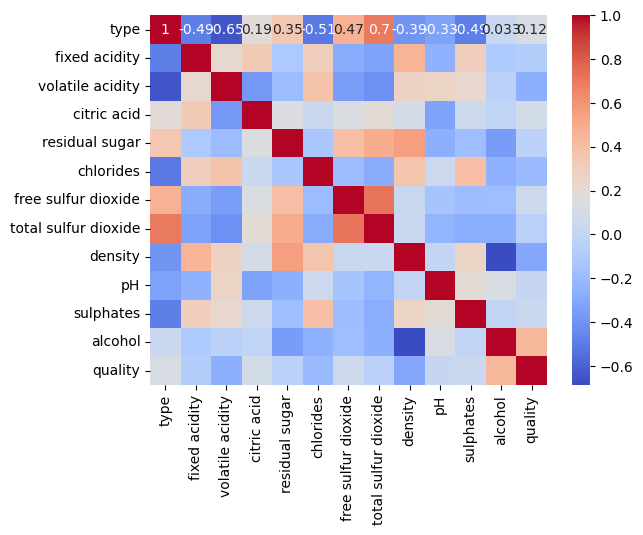

In [13]:
# Checking for correlation between all the columns
# Creating the correlation matrix of the dataset
temp_corr_matrix = wine_df.corr()
print(temp_corr_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(temp_corr_matrix, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

In [14]:
# Not dropping any columns since the correlation between all the columns is less than 0.8

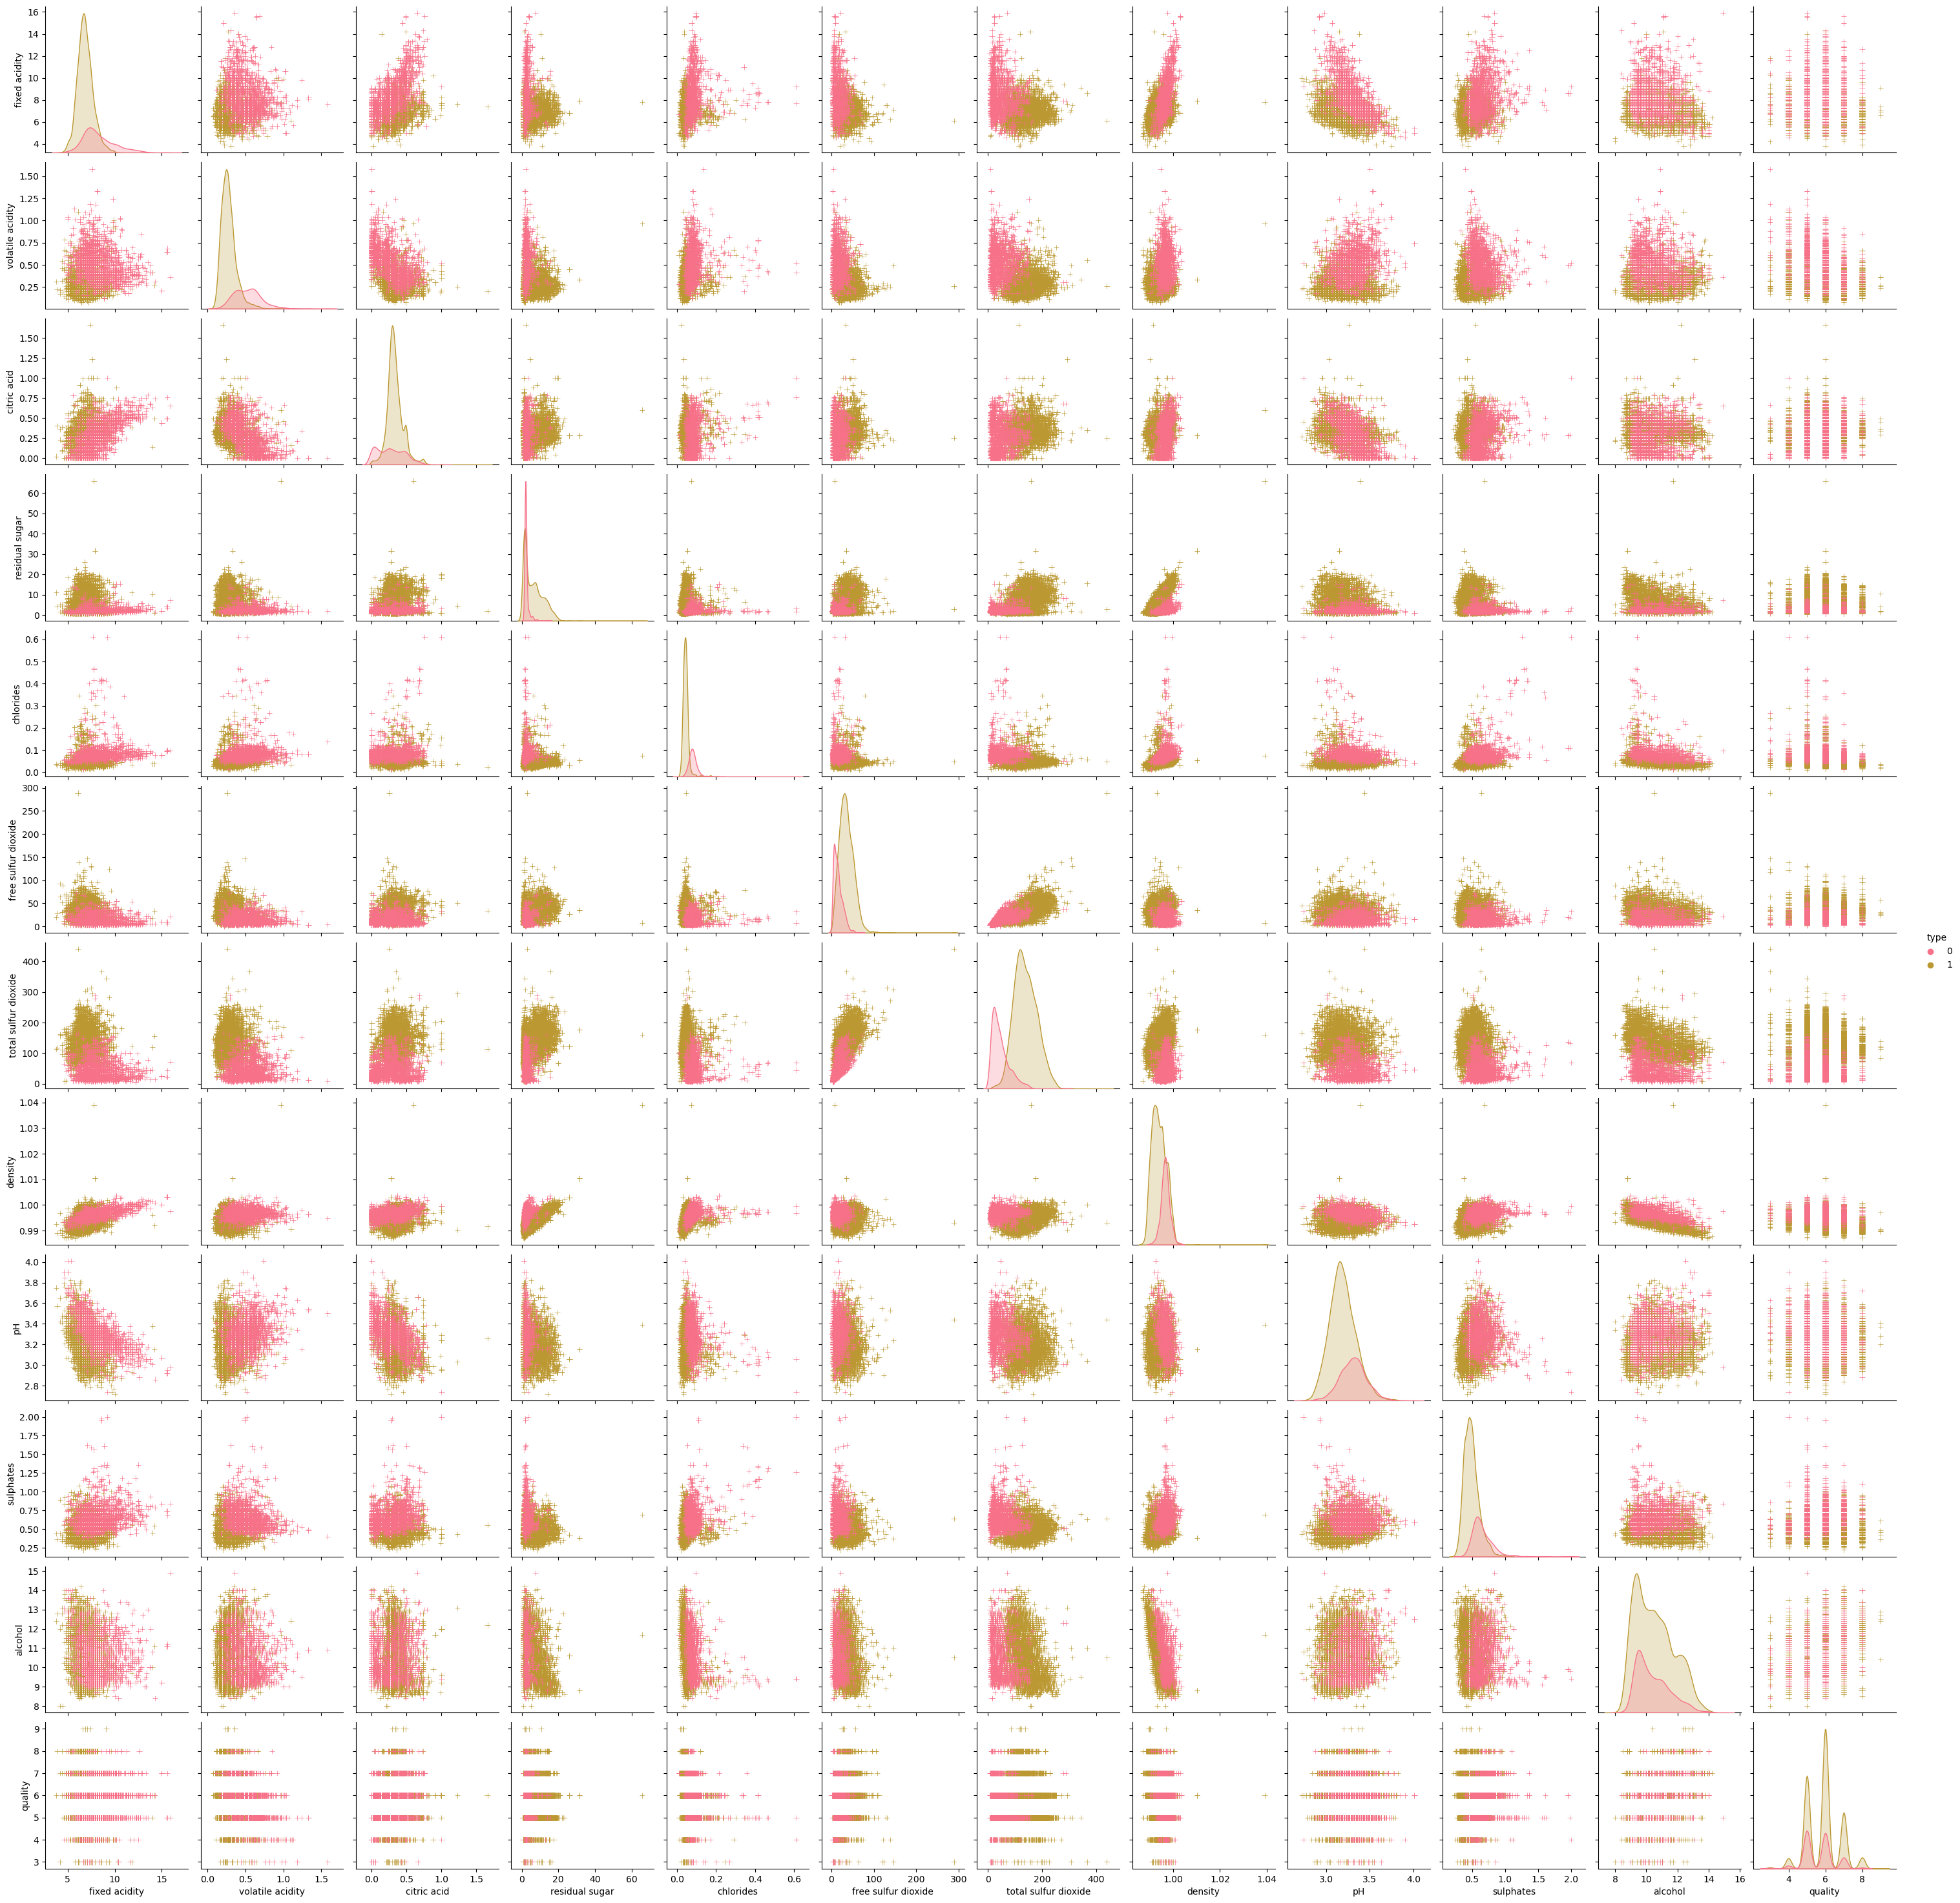

In [15]:
# Pairplot
g = sns.pairplot(wine_df, hue='type', markers='+')
plt.show()
# pink-red, mustard-white

In [16]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


### Insert our Wine Quality DataFrame into a FeatureGroup
Let's write our historical Wine Quality feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [17]:
# Rename columns to comply with Hopsworks Feature Store naming conventions
wine_df.columns = wine_df.columns.str.lower()  # Convert to lowercase
wine_df.columns = wine_df.columns.str.replace(' ', '_')  # Replace spaces with underscores

# Now create the feature group
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["type", "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"],
    description="Wine quality dataset"
)
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/210070/fs/209989/fg/228695


Uploading Dataframe: 100.00% |█| Rows 6497/6497 | Elapsed Time: 00:12 | Remainin


Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/210070/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7feb66582dc0>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.